In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Template Matching

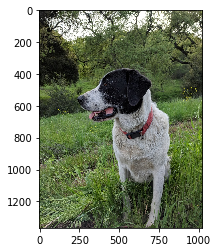

In [3]:
full = cv2.imread('./DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

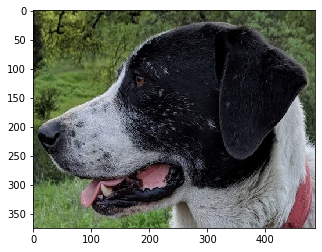

In [5]:
face= cv2.imread('./DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [9]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 
           'cv2.TM_CCOEFF_NORMED', 
           'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 
           'cv2.TM_SQDIFF', 
           'cv2.TM_SQDIFF_NORMED']

In [20]:
# eval method
myfunc = eval('sum')
myfunc([1,2,3])

6

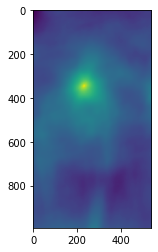

In [21]:
# test out one of the method
method = eval('cv2.TM_CCOEFF')
# Apply template Matching with the method
res = cv2.matchTemplate(full, face, method)
plt.imshow(res)

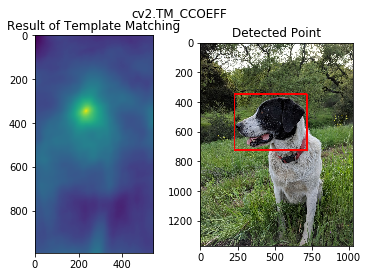

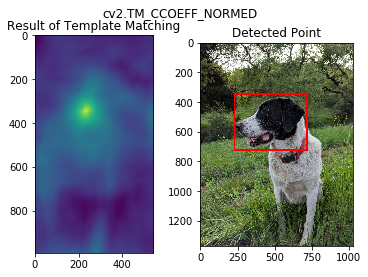

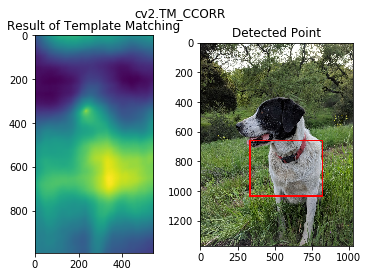

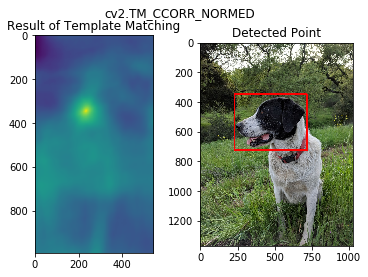

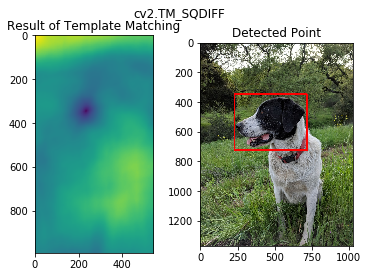

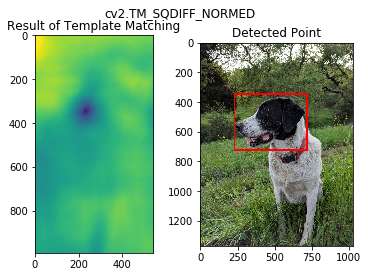

In [23]:
height, width, hannels = face.shape
for m in methods:
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations, to draw rectangle
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # top_left = min_loc 
    
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

# Corner Detection

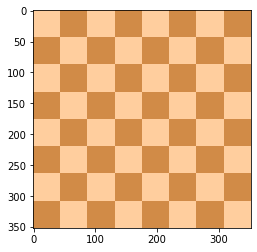

In [24]:
flat_chess = cv2.imread('./DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

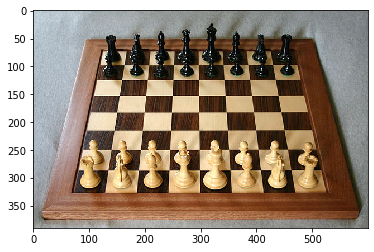

In [27]:
real_chess = cv2.imread('./DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

## Harris Corner Detection

**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

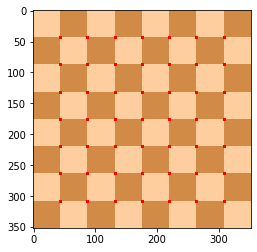

In [28]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
flat_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

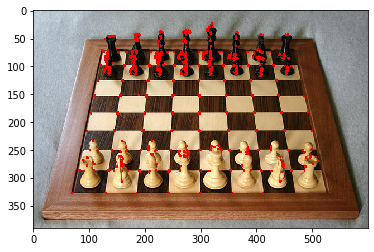

In [31]:
# Convert Gray Scale Image to Float Values
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess)

## Shi-Tomasi Corner Detector & Good Features to Track Paper

[Link to Paper from Video](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned. -1 for no limit
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

In [33]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('./DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

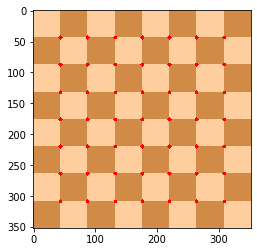

In [34]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

In [35]:
real_chess = cv2.imread('./DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

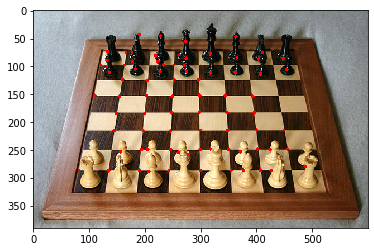

In [36]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)

# Edge Detection

## Canny Edge Detection

https://en.wikipedia.org/wiki/Canny_edge_detector

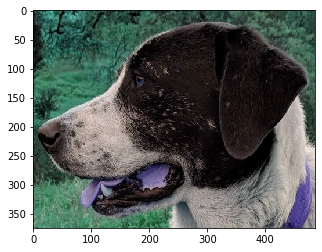

In [37]:
img = cv2.imread('./DATA/sammy_face.jpg')
plt.imshow(img)

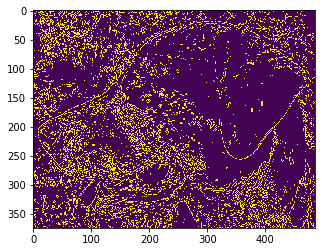

In [38]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edges)

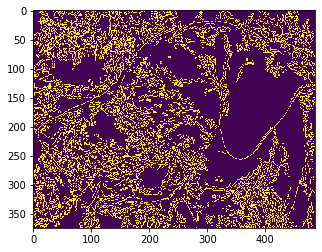

In [39]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)
plt.imshow(edges)

## Choosing Thresholds

https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

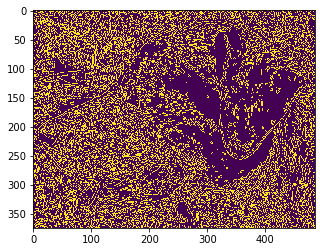

In [40]:
med_val = np.median(img) 
lower = int(max(0, 0.7* med_val))
upper = int(min(255,1.3 * med_val))
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

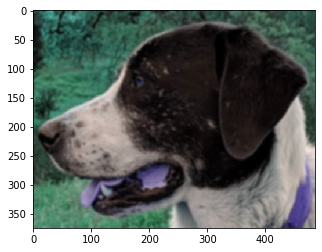

In [41]:
blurred_img = cv2.blur(img,ksize=(5,5))
plt.imshow(blurred_img)

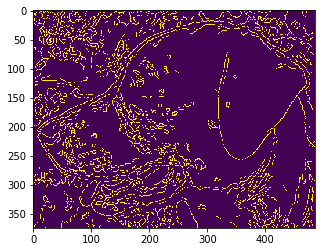

In [42]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

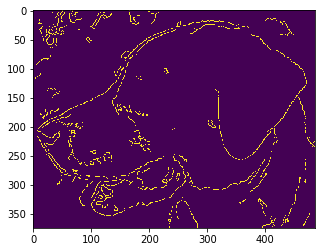

In [43]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+80)
plt.imshow(edges)

# Grid Detection

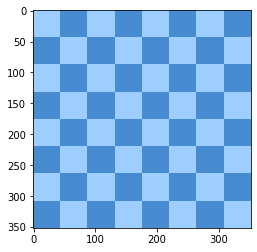

In [46]:
flat_chess = cv2.imread('./DATA/flat_chessboard.png')
plt.imshow(flat_chess,cmap='gray')

In [50]:
found, corners = cv2.findChessboardCorners(flat_chess,(7,7))

if found:
    print('OpenCV was able to find the corners')
else:
    print("OpenCV did not find corners. Double check your patternSize.")
    
print(corners.shape)

OpenCV was able to find the corners
(49, 1, 2)


In [51]:
flat_chess_copy = flat_chess.copy()
cv2.drawChessboardCorners(flat_chess_copy, (7, 7), corners, found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

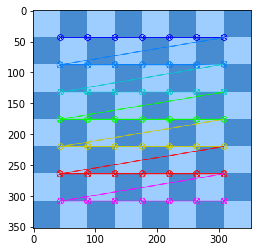

In [52]:
plt.imshow(flat_chess_copy)

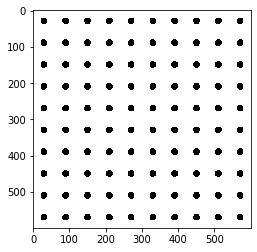

In [53]:
# circle based grid
dots = cv2.imread('./DATA/dot_grid.png')
plt.imshow(dots)

In [54]:
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)
dbg_image_circles = dots.copy()
cv2.drawChessboardCorners(dbg_image_circles, (10, 10), corners, found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

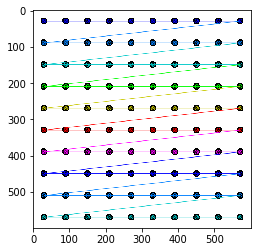

In [55]:
plt.imshow(dbg_image_circles)

# Contour Detection

**FindContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

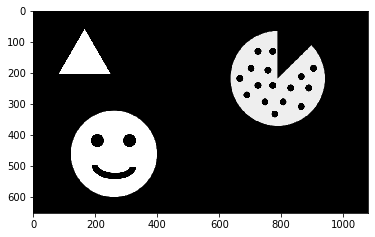

In [56]:
img = cv2.imread('./DATA/internal_external.png',0)
plt.imshow(img,cmap='gray')

In [59]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(type(contours))
print(len(contours))
print(type(hierarchy))
print(hierarchy.shape)

<class 'list'>
22
<class 'numpy.ndarray'>
(1, 22, 4)


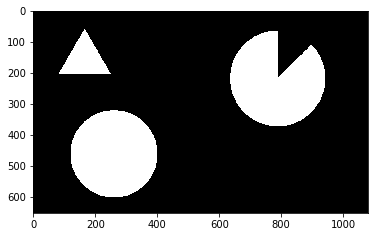

In [61]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)
        
plt.imshow(external_contours,cmap='gray')

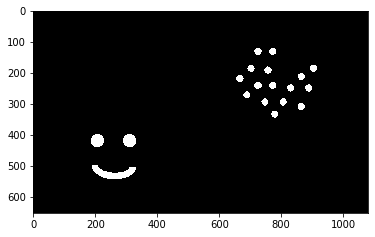

In [62]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 then its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)

plt.imshow(image_internal,cmap='gray')

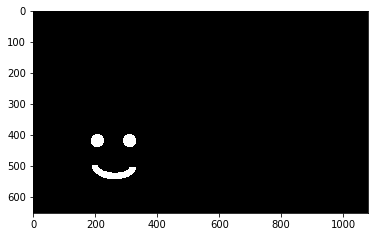

In [63]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # show only smiley
    if hierarchy[0][i][3] == 0:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)

plt.imshow(image_internal,cmap='gray')

# Feature Matching

In [68]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

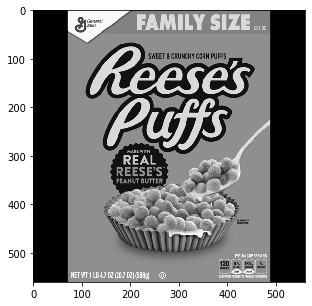

In [69]:
reeses = cv2.imread('./DATA/reeses_puffs.png',0)
display(reeses)

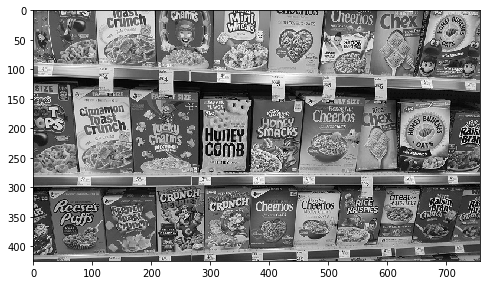

In [70]:
cereals = cv2.imread('./DATA/many_cereals.jpg',0)
display(cereals)

## Brute Force Detection with ORB Descriptors

In [71]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,mask = None)
kp2, des2 = orb.detectAndCompute(cereals,mask = None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance. Higher distance better match
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:250],None,flags=2)

139


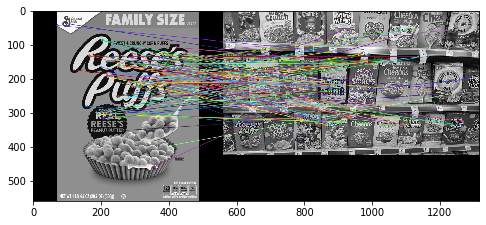

In [72]:
display(reeses_matches)

# Face Detection

In [84]:
nadia = cv2.imread('./DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('./DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('./DATA/solvay_conference.jpg',0)

In [87]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img) 
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
    return face_img

# OpenCV comes with these pre-trained cascade files
face_cascade = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_frontalface_default.xml')

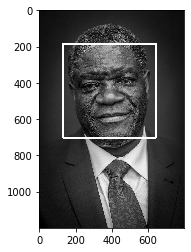

In [88]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

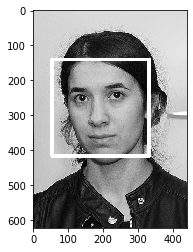

In [89]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

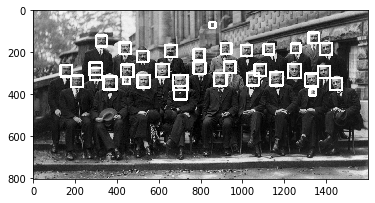

In [90]:
# Gets errors! Add some parameters to solve it!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [91]:
def adj_detect_face(img):
    
    face_img = img.copy()
    # detect it as face when they are near!
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.1, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

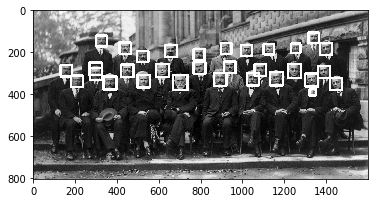

In [92]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [93]:
eye_cascade = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_eye.xml')
def detect_eyes(img):
    face_img = img.copy()
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

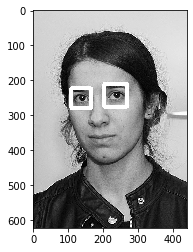

In [94]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

# Practice

In [99]:
def display(img):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

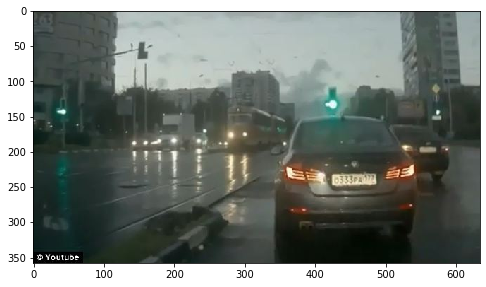

In [100]:
img = cv2.imread('./DATA/car_plate.jpg')
display(img)

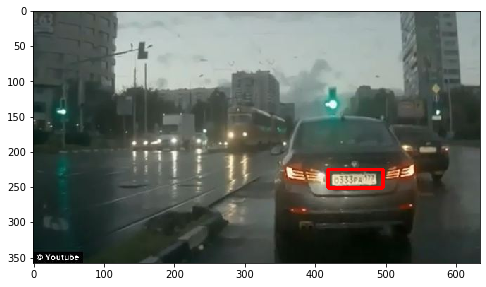

In [103]:
plate_cascade = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_russian_plate_number.xml')

def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4) 
        
    return plate_img
result = detect_plate(img)
display(result)

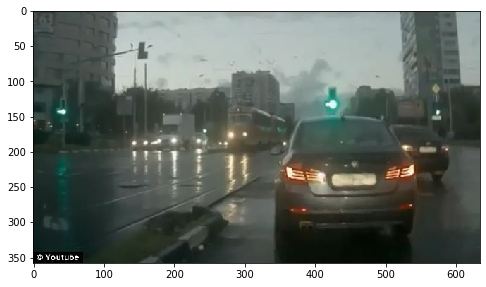

In [104]:
# blurring the number plate

def detect_and_blur_plate(img):
    # Watch solutions video for line by line explanation!
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    for (x,y,w,h) in plate_rects: 
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        plate_img[y:y+h,x:x+w] = blurred_roi
    return plate_img

result = detect_and_blur_plate(img)
display(result)